In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from os.path import join

In [3]:
%run ../tools/echelle.py
cb = Calibrations('../resources/calibration_files')

In [4]:
cb.start() 

In [5]:
%run ../tools/echelle.py
em = EchelleImage('../resources/test_data/CCD_Example.SIF', clbr=cb)

In [6]:
# Calculate order spectra
em.calculate_order_spectra()
print("Initial order spectra shape:", em.order_spectra.shape)
os_init = em.order_spectra.copy()

# Apply corrections
em.correct_order_shapes()
print("Corrected order spectra shape:", em.order_spectra.shape)
os_corr = em.order_spectra.copy()

Initial order spectra shape: (30, 28, 1024)
Corrected order spectra shape: (30, 28, 1024)


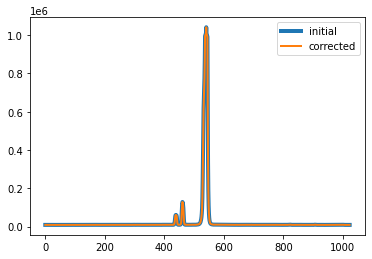

In [7]:
# Visualise initial vs corrected order spectra
frame = 3  # select a single frame from image
order = 6  # select single order from frame
plt.plot(os_init[frame, order], lw=4, label='initial')
plt.plot(os_corr[frame, order], lw=2, ls='-', label='corrected')
plt.legend()

In [8]:
# Prepare spectra for all frames
em.calculate_spectra()
# em.plot_order_image(28,6,20)

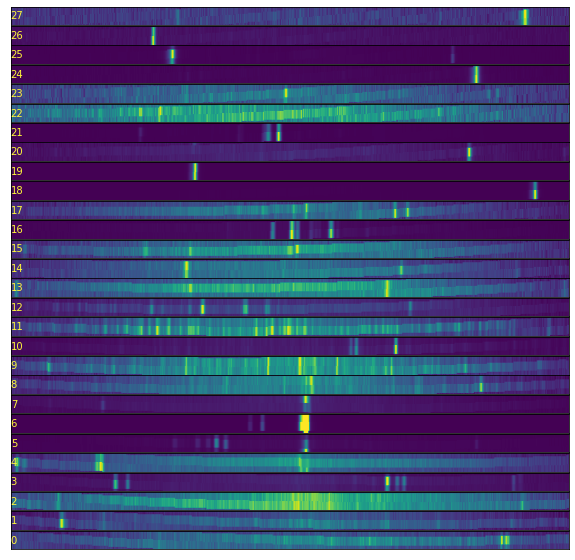

In [9]:
# Plot diffraction orders for a given frame
frame = 7
em.plot_cut_image(frame, 2)
plt.gcf().set_size_inches(10, 10)
# savefig('CCD_cut.png', dvi=300, pad_inches=0, bbox_inches='tight')

Text(0, 0.5, 'vertical pixel number')

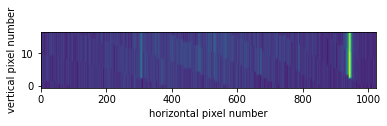

In [10]:
# Plot one diffraction order
em.plot_order_image(7, 27, 10)
plt.xlabel('horizontal pixel number')
plt.ylabel('vertical pixel number')

Text(0.5, 0, 'pixel number')

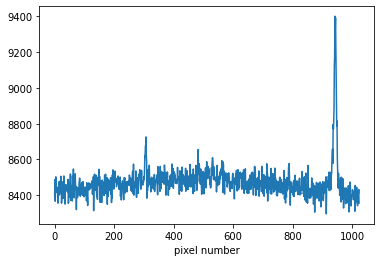

In [11]:
plt.plot(em.order_spectra[7, 27, :])
plt.xlabel('pixel number')

In [12]:
# Convert an image into spectra
s = Spectrum(em)

Text(0.5, 0, 'Wavelength, nm')

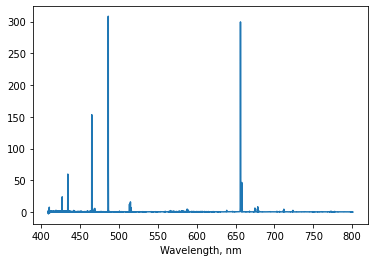

In [13]:
# Calibrated spectrum
frame = 6
x = s.wavelength
y = s.spectra_to_save['wm'][frame]
plt.plot(x, y)
plt.xlabel('Wavelength, nm')

# Wavelength vs accumulated pixel number
Accumulated pixel number: cut images for each diffraction order are stacked to 
form a continuous spectrum. The overlapping parts are cut, and a continuous spectrum is stored.

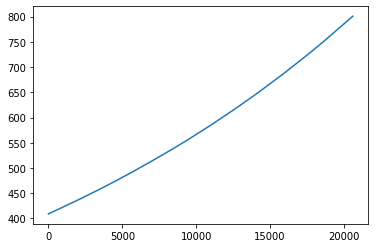

In [14]:
plt.plot(x)